In [1]:
import pandas as pd
import numpy as np

# Load Model and Processing

In [2]:
Emotions = pd.read_csv('/kaggle/input/feature-extract-7emo/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotions
0,0.036576,0.595285,0.518214,0.467623,0.385958,0.406441,0.428003,0.440104,0.408092,0.355243,...,6.810345e-06,9.494143e-07,1.276122e-07,5.920768e-08,6.259482e-08,6.776799e-08,9.807201e-08,7.782995e-08,3.130733e-08,happy
1,0.129991,0.673687,0.613982,0.580276,0.509139,0.507287,0.473928,0.465629,0.452810,0.439725,...,3.197438e-02,3.272778e-02,3.342170e-02,3.258536e-02,3.363657e-02,3.208363e-02,3.132801e-02,3.186873e-02,3.222414e-02,happy
2,0.042853,0.534393,0.579030,0.523467,0.491737,0.396542,0.397118,0.427628,0.458932,0.404576,...,6.385361e-06,2.748472e-06,4.582715e-07,6.079417e-08,1.479520e-08,1.094685e-08,1.248435e-08,7.627145e-09,1.075299e-09,happy
3,0.047286,0.534577,0.532759,0.547124,0.471091,0.469727,0.530667,0.520320,0.515186,0.549633,...,3.483586e-08,1.314616e-08,7.895075e-09,7.103722e-09,7.353459e-09,6.959937e-09,6.308861e-09,3.876357e-09,4.155905e-10,fear
4,0.119217,0.638274,0.655934,0.668280,0.649310,0.614610,0.629233,0.595497,0.571707,0.587855,...,9.038013e-05,9.201362e-05,8.578269e-05,9.291335e-05,8.828320e-05,9.429989e-05,8.948358e-05,9.301379e-05,9.269559e-05,fear


In [3]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [4]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [5]:
(Y.shape, X.shape)

((36486, 7), (36486, 162))

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 7), (9122, 162), (9122, 7))

In [7]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [8]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 7), (9122, 162), (9122, 7))

In [9]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,mode='auto')
es=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

# LSTM

In [12]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [13]:
MODEL = Sequential()
MODEL.add(layers.LSTM(128, return_sequences=True, input_shape=(X.shape[1], 1)))
MODEL.add(layers.LSTM(128))
MODEL.add(layers.Dense(7, activation='softmax'))

print(MODEL.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 162, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 199,047
Trainable params: 199,047
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
428/428 [==============================] - 16s 22ms/step - loss: 1.7924 - categorical_accuracy: 0.2545 - val_loss: 1.7295 - val_categorical_accuracy: 0.2871
Epoch 2/100
428/428 [==============================] - 9s 21ms/step - loss: 1.7100 - categorical_accuracy: 0.2902 - val_loss: 1.7266 - val_categorical_accuracy: 0.2687
Epoch 3/100
428/428 [==============================] - 9s 20ms/step - loss: 1.6774 - categorical_accuracy: 0.3085 - val_loss: 1.6720 - val_categorical_accuracy: 0.3048
Epoch 4/100
428/428 [==============================] - 9s 20ms/step - loss: 1.6636 - categorical_accuracy: 0.3173 - val_loss: 1.6642 - val_categorical_accuracy: 0.3057
Epoch 5/100
428/428 [==============================] - 9s 20ms/step - loss: 1.6397 - categorical_accuracy: 0.3303 - val_loss: 1.5889 - val_categorical_accuracy: 0.3522
Epoch 6/100
428/428 [==============================] - 11s 25ms/step - loss: 1.5789 - categorical_accuracy: 0.3592 - val_loss: 1.5328 - val_categorical_accurac

In [17]:
import matplotlib.pyplot as plt

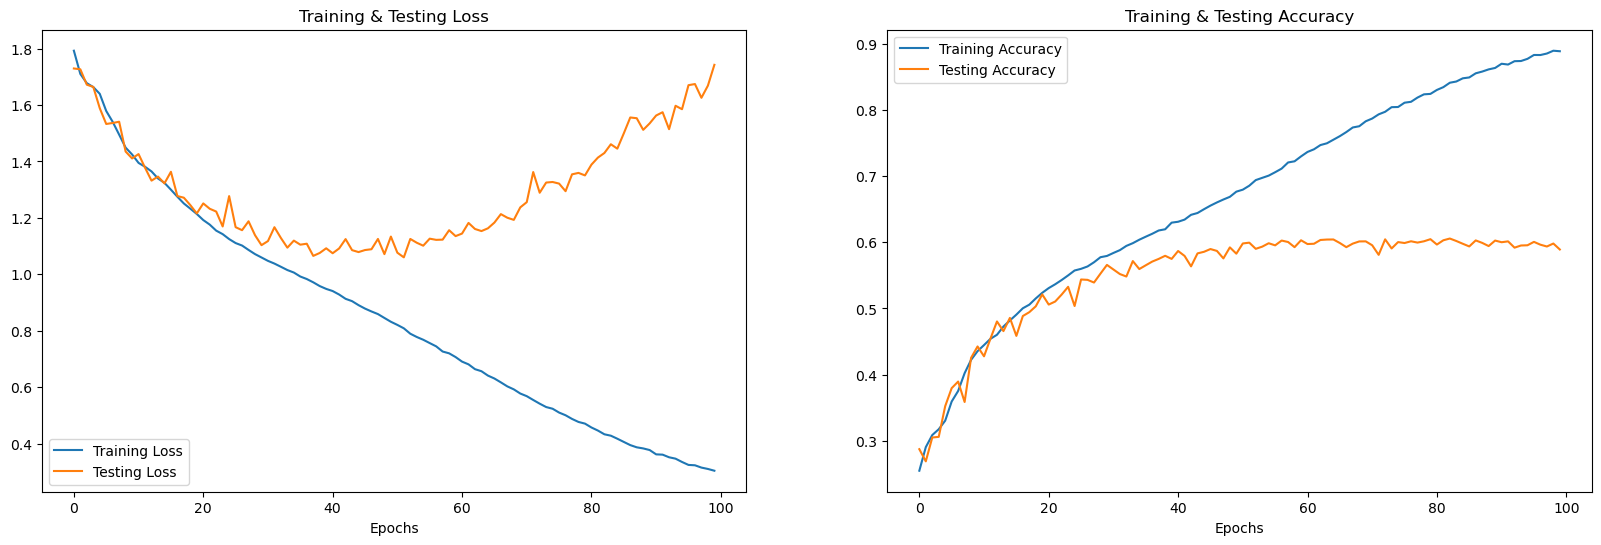

In [31]:
# print("Accuracy of our model on test data : " , MODEL.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = model.history['categorical_accuracy']
train_loss = model.history['loss']
test_acc = model.history['val_categorical_accuracy']
test_loss = model.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Model Conv1D - LSTM

In [20]:
#Build the model

# define model
model000 = Sequential()
model000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

          
model000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))
          
model000.add(LSTM(128, return_sequences=True)) 
model000.add(LSTM(128, return_sequences=True)) 
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(128, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(7, activation='softmax'))



model000.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 1024)         6144      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 1024)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 81, 1024)         4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 81, 1024)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 512)           2621952   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 512)         

In [21]:
model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
hist1=model000.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
428/428 [==============================] - 26s 36ms/step - loss: 1.6026 - accuracy: 0.3363 - val_loss: 2.2246 - val_accuracy: 0.1712
Epoch 2/100
428/428 [==============================] - 13s 31ms/step - loss: 1.3890 - accuracy: 0.4529 - val_loss: 1.6444 - val_accuracy: 0.3543
Epoch 3/100
428/428 [==============================] - 14s 33ms/step - loss: 1.2588 - accuracy: 0.4997 - val_loss: 1.2190 - val_accuracy: 0.5094
Epoch 4/100
428/428 [==============================] - 14s 34ms/step - loss: 1.2101 - accuracy: 0.5171 - val_loss: 1.1731 - val_accuracy: 0.5273
Epoch 5/100
428/428 [==============================] - 14s 33ms/step - loss: 1.1665 - accuracy: 0.5364 - val_loss: 1.5680 - val_accuracy: 0.4266
Epoch 6/100
428/428 [==============================] - 13s 31ms/step - loss: 1.1396 - accuracy: 0.5449 - val_loss: 1.3381 - val_accuracy: 0.4751
Epoch 7/100
428/428 [==============================] - 13s 30ms/step - loss: 1.1100 - accuracy: 0.5604 - val_loss: 1.1187 - val_ac

In [24]:
from matplotlib import pyplot as plt

286/286 [==============================] - 2s 8ms/step - loss: 1.0489 - accuracy: 0.7055
Accuracy of our model on test data :  70.5547034740448 %


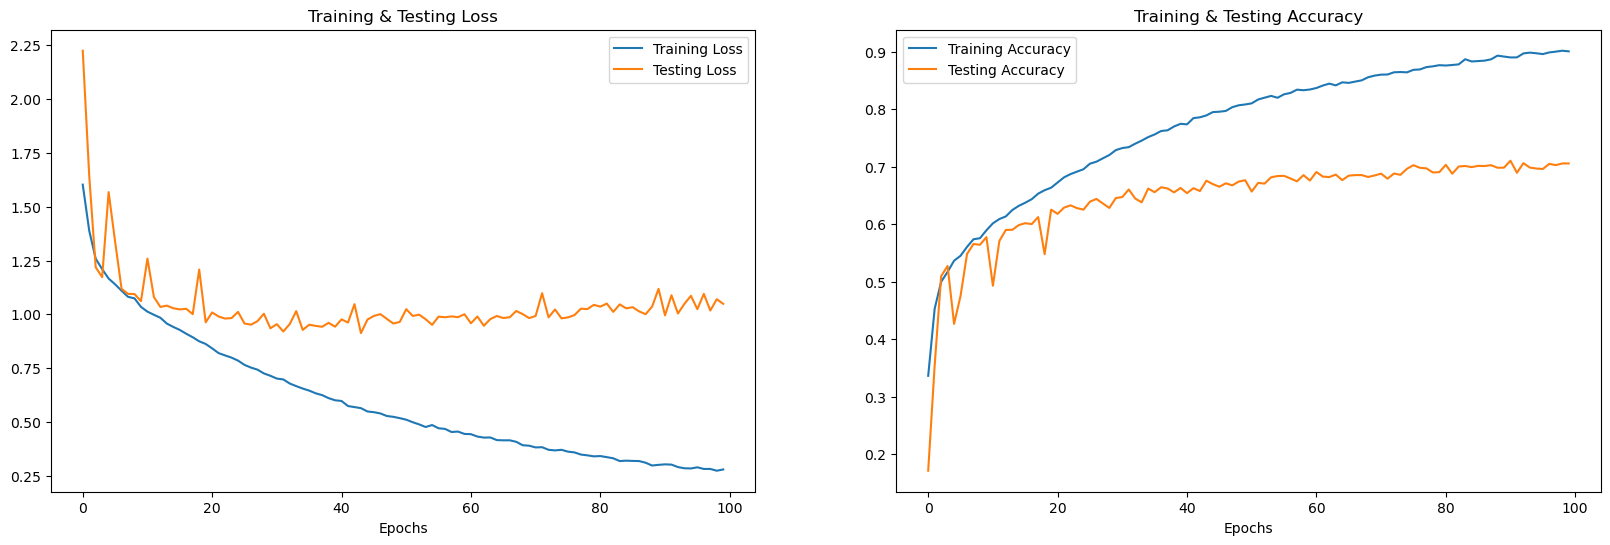

In [26]:
print("Accuracy of our model on test data : " , model000.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
test_acc = hist1.history['val_accuracy']
test_loss = hist1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# New Model, improve from above

In [32]:
# define model
model2 = Sequential()
model2.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

          
model2.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
          
model2.add(LSTM(128, return_sequences=True)) 
model2.add(LSTM(128, return_sequences=True)) 
model2.add(Dropout(0.3))
model2.add(LSTM(128))
model2.add(Dropout(0.3))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(7, activation='softmax'))



model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 162, 1024)         6144      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 81, 1024)         0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 81, 1024)         4096      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 81, 1024)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 81, 512)           2621952   
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 41, 512)         

In [33]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
hist2=model2.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
428/428 [==============================] - 23s 34ms/step - loss: 1.7222 - accuracy: 0.2802 - val_loss: 3.3435 - val_accuracy: 0.1601
Epoch 2/100
428/428 [==============================] - 14s 34ms/step - loss: 1.5816 - accuracy: 0.3313 - val_loss: 1.5267 - val_accuracy: 0.3773
Epoch 3/100
428/428 [==============================] - 14s 34ms/step - loss: 1.4777 - accuracy: 0.3967 - val_loss: 1.4103 - val_accuracy: 0.4246
Epoch 4/100
428/428 [==============================] - 13s 30ms/step - loss: 1.3885 - accuracy: 0.4442 - val_loss: 1.3658 - val_accuracy: 0.4588
Epoch 5/100
428/428 [==============================] - 13s 31ms/step - loss: 1.3173 - accuracy: 0.4782 - val_loss: 2.0177 - val_accuracy: 0.3995
Epoch 6/100
428/428 [==============================] - 13s 31ms/step - loss: 1.3146 - accuracy: 0.4795 - val_loss: 1.2304 - val_accuracy: 0.5129
Epoch 7/100
428/428 [==============================] - 14s 33ms/step - loss: 1.2397 - accuracy: 0.5134 - val_loss: 1.2210 - val_ac

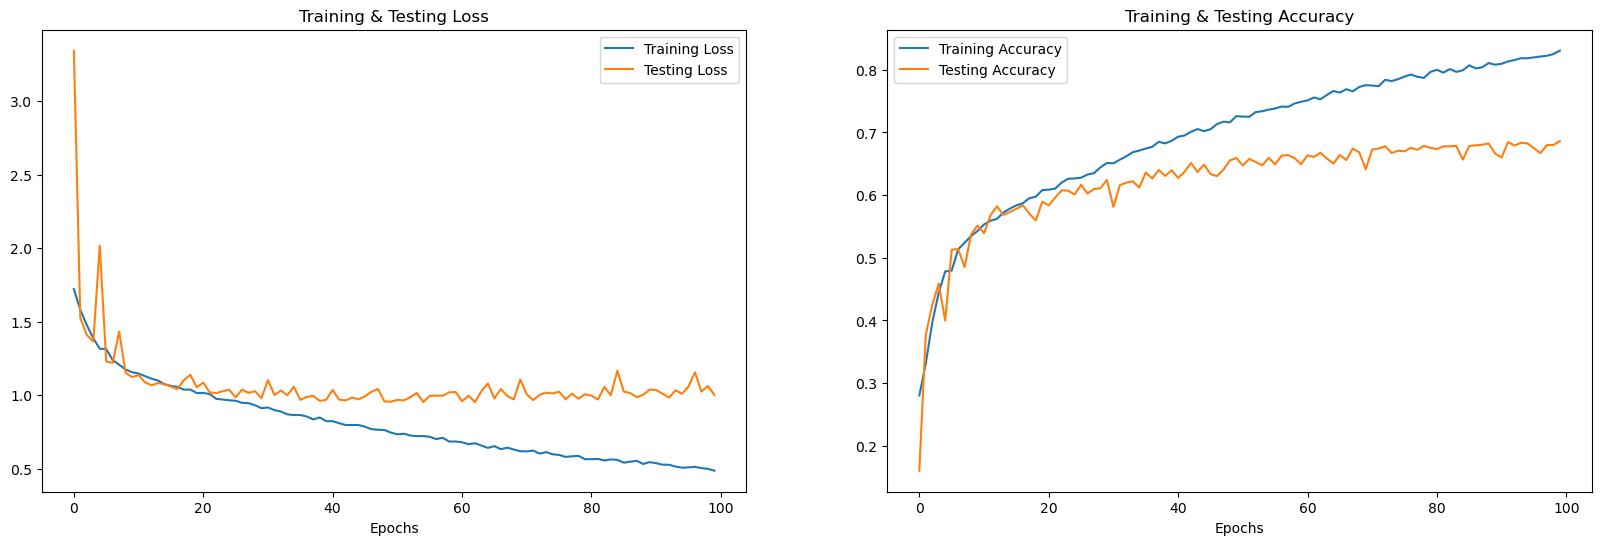

In [39]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = hist2.history['accuracy']
train_loss = hist2.history['loss']
test_acc = hist2.history['val_accuracy']
test_loss = hist2.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Save File Model

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = model000.to_json()
with open("cnnlstmmodel001.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model000.save_weights("cnnlstmmodel001.h5")
print("Saved model to disk") 

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/kaggle/working/cnnlstmmodel001.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new modela
loaded_model.load_weights("/kaggle/working/cnnlstmmodel001.h5")
print("Loaded model from disk")

In [ ]:
import joblib

#saving scaler
joblib.dump(scaler, 'scaler.joblib')

#loading our scaler

scaler = joblib.load('scaler.joblib')

#saving our encoder

joblib.dump(encoder, 'encoder.joblib')

#loading our encoder

encoder= joblib.load('encoder.joblib')